In [9]:
try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

tf.random.set_seed(13)
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
2.0.0


In [2]:
# Load in the data
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255., X_test / 255.
X_train.shape

(60000, 28, 28)

In [0]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=X_train.shape[-2:]),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [0]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [5]:
# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2934 - accuracy: 0.9148 - val_loss: 0.1369 - val_accuracy: 0.9583
Epoch 2/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.1414 - accuracy: 0.9576 - val_loss: 0.1114 - val_accuracy: 0.9663
Epoch 3/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.1076 - accuracy: 0.9673 - val_loss: 0.0811 - val_accuracy: 0.9750
Epoch 4/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0872 - accuracy: 0.9730 - val_loss: 0.0781 - val_accuracy: 0.9752
Epoch 5/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0742 - accuracy: 0.9765 - val_loss: 0.0752 - val_accuracy: 0.9771
Epoch 6/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0655 - accuracy: 0.9791 - val_loss: 0.0666 - val_accuracy: 0.9782
Epoch 7/10
60000/60000 [==============================] 

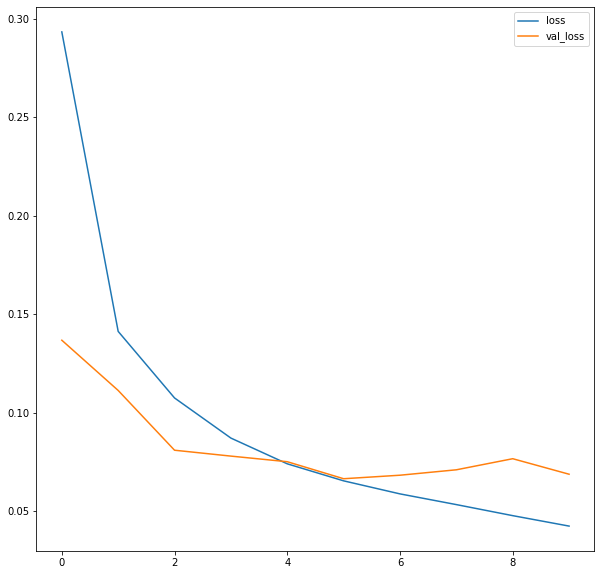

In [10]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

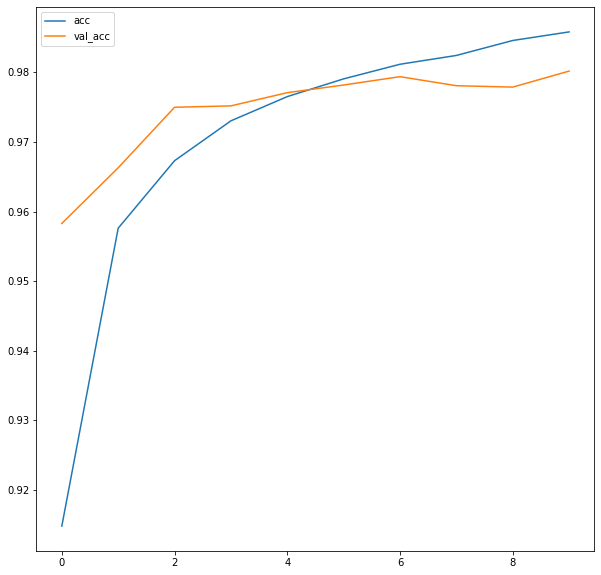

In [11]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [8]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose = 0)
loss, accuracy

(0.06888096032309696, 0.9802)

Confusion matrix, without normalization
[[ 970    1    1    1    1    0    2    1    2    1]
 [   0 1123    2    2    0    1    1    1    5    0]
 [   3    0 1007    6    1    0    1    5    9    0]
 [   0    0    2  991    0    2    0    5    4    6]
 [   1    0    0    1  956    0    6    1    3   14]
 [   2    0    0   10    1  872    2    1    3    1]
 [   3    3    1    1    6    6  935    1    2    0]
 [   0    3    6    2    0    0    0 1008    2    7]
 [   6    0    1    2    2    2    1    3  956    1]
 [   0    3    1    5    6    4    0    5    1  984]]


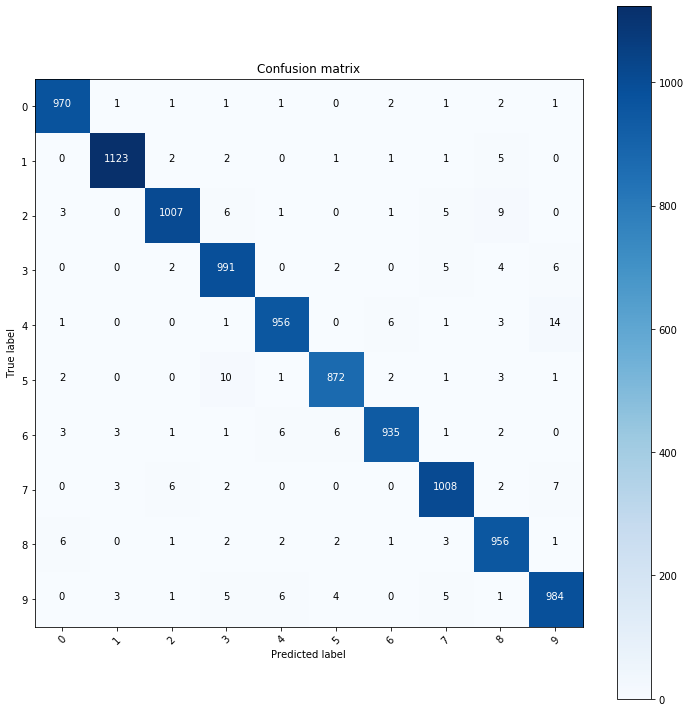

In [12]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

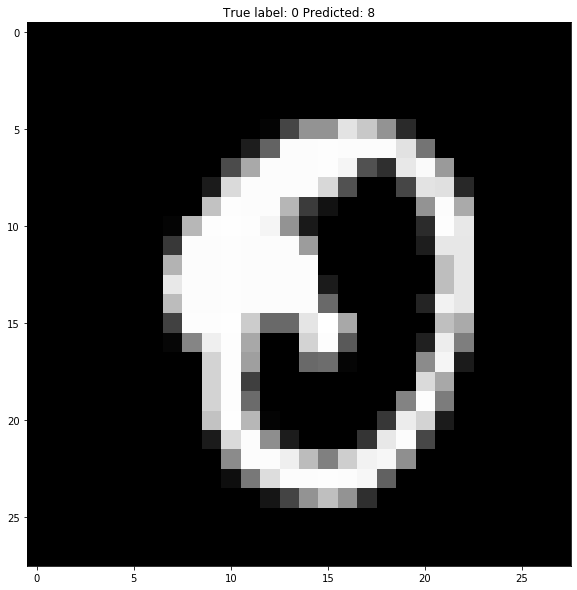

In [13]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));